Model: Linear Regression
  RMSE: 275389.42134644237
  R^2: -0.03730495603114603

Model: Ridge
  RMSE: 274959.4758428227
  R^2: -0.03406854660144076

Model: Lasso
  RMSE: 275388.9088317672
  R^2: -0.03730109507297774

Preço previsto para o imóvel: R$ 657339.37


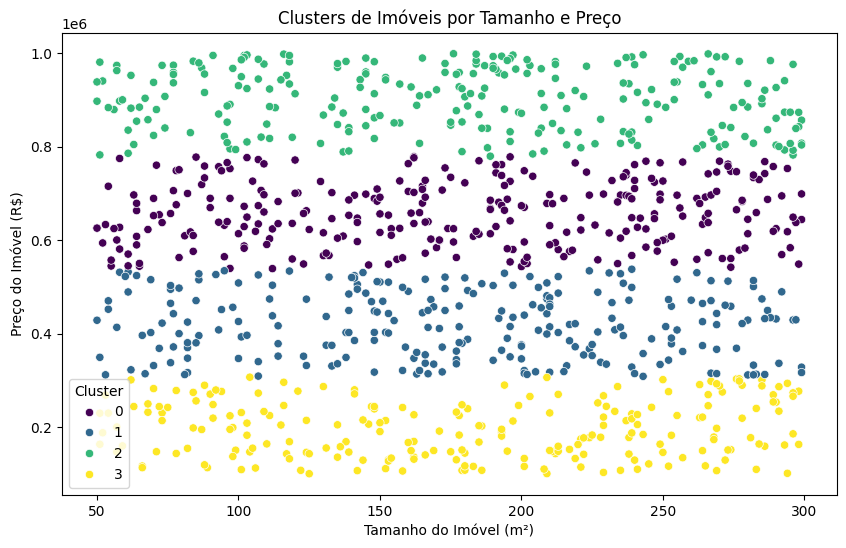


Estatísticas dos Clusters:
          tamanho_imovel  num_quartos  num_banheiros  idade_imovel  \
cluster                                                             
0            177.677083     2.961806       2.017361     24.413194   
1            177.209016     2.995902       1.950820     25.168033   
2            178.564000     2.900000       1.964000     24.052000   
3            180.958716     2.954128       1.903670     25.724771   

         num_vagas_garagem      andar     vista  acabamento  prox_servicos  \
cluster                                                                      
0                 1.531250   9.677083  0.548611    2.437500       0.482639   
1                 1.491803  10.163934  0.479508    2.422131       0.590164   
2                 1.424000  10.008000  0.504000    2.516000       0.564000   
3                 1.454128   9.633028  0.500000    2.376147       0.458716   

         acessibilidade_transporte  ...  areas_comuns  tecnologias  \
cluster          

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import folium
from folium.plugins import MarkerCluster

# Carregando os dados
data = pd.read_csv('../data/dataset_imoveis.csv')

# Selecionando as colunas relevantes (certifique-se de que os nomes das colunas correspondem aos descritos)
x_columns = [
    'tamanho_imovel', 'num_quartos', 'num_banheiros', 'idade_imovel', 'num_vagas_garagem',
    'andar', 'vista', 'acabamento', 'prox_servicos', 'acessibilidade_transporte',
    'infraestrutura_regiao', 'seguranca_bairro', 'zona_valorizacao', 'taxa_juros',
    'oferta_demanda', 'indices_economicos', 'areas_comuns', 'tecnologias',
    'condominio_fechado', 'momento_compra_venda', 'historico_valorizacao',
    'zoneamento_urbano', 'impostos_taxas', 'prox_praias_parques', 'risco_ambiental'
]

y_column = 'preco_imovel'

# Preparando os dados
X = data[x_columns]
y = data[y_column]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Treinando o modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Treinando o modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Avaliação dos modelos
models = {'Linear Regression': linear_model, 'Ridge': ridge_model, 'Lasso': lasso_model}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"  RMSE: {rmse}")
    print(f"  R^2: {r2}\n")

# Salvando o melhor modelo (substitua pelo modelo com melhor performance)
best_model = linear_model  # ou ridge_model, lasso_model
joblib.dump(best_model, 'melhor_modelo.pkl')

# Script para futuras predições
def predict_price(input_data):
    """
    Função para prever o preço de um imóvel com base nos dados de entrada.
    input_data: dict contendo as características do imóvel.
    Retorna o preço previsto.
    """
    model = joblib.load('melhor_modelo.pkl')
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)
    return prediction[0]

# Exemplo de uso da função de predição
input_example = {
    'tamanho_imovel': 120,
    'num_quartos': 3,
    'num_banheiros': 2,
    'idade_imovel': 5,
    'num_vagas_garagem': 2,
    'andar': 3,
    'vista': 1,
    'acabamento': 4,
    'prox_servicos': 1,
    'acessibilidade_transporte': 1,
    'infraestrutura_regiao': 4,
    'seguranca_bairro': 5,
    'zona_valorizacao': 3,
    'taxa_juros': 0.05,
    'oferta_demanda': 2,
    'indices_economicos': 3,
    'areas_comuns': 1,
    'tecnologias': 2,
    'condominio_fechado': 1,
    'momento_compra_venda': 1,
    'historico_valorizacao': 3,
    'zoneamento_urbano': 2,
    'impostos_taxas': 1,
    'prox_praias_parques': 4,
    'risco_ambiental': 2
}

predicted_price = predict_price(input_example)
print(f"Preço previsto para o imóvel: R$ {predicted_price:.2f}")

# Insights sobre Clusters
# Reduzindo os dados para colunas relacionadas a características de cluster
cluster_columns = ['tamanho_imovel', 'preco_imovel', 'zona_valorizacao', 'seguranca_bairro', 'prox_servicos']
cluster_data = data[cluster_columns]

# Criando os clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(cluster_data)

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_data, x='tamanho_imovel', y='preco_imovel', hue=data['cluster'], palette='viridis'
)
plt.title('Clusters de Imóveis por Tamanho e Preço')
plt.xlabel('Tamanho do Imóvel (m²)')
plt.ylabel('Preço do Imóvel (R$)')
plt.legend(title='Cluster')
plt.show()

# Estatísticas dos clusters
cluster_stats = data.groupby('cluster').mean()
print("\nEstatísticas dos Clusters:\n", cluster_stats)

# Mapa Interativo
# Simulando coordenadas para demonstração (substitua pelas reais se disponíveis)
data['latitude'] = np.random.uniform(-23.7, -23.5, size=len(data))
data['longitude'] = np.random.uniform(-46.7, -46.5, size=len(data))

# Criando o mapa base
mapa = folium.Map(location=[-23.6, -46.6], zoom_start=12)
marker_cluster = MarkerCluster().add_to(mapa)

# Adicionando os imóveis ao mapa
for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Preço: R$ {row['preco_imovel']:.2f}<br>"
            f"Cluster: {row['cluster']}<br>"
            f"Tamanho: {row['tamanho_imovel']} m²"
        ),
        icon=folium.Icon(color='blue' if row['cluster'] == 0 else 'green')
    ).add_to(marker_cluster)

# Salvando o mapa em arquivo HTML
mapa.save('mapa_interativo_imoveis.html')
print("Mapa interativo salvo como 'mapa_interativo_imoveis.html'.")